In [10]:
import pandas as pd
import os

DATA_DIR = '/fsx/jdelavande/benchlab/videos/data'
PREFIX = 'exp_'

dfs = []
for csv in os.listdir(DATA_DIR):
    if csv.endswith('.csv') and csv.startswith(PREFIX) and not 'codecarbon' in csv:
        df = pd.read_csv(os.path.join(DATA_DIR, csv))
        df['name_csv'] = csv
        df['model_name'] = csv.split('_')[1].split('_')[0]
        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)
combined_df['energy_generate_gpu'] = combined_df.apply(
    lambda row: row['energy_generate'] if pd.notnull(row['energy_generate']) else row['energy_generate_gpu'],
    axis=1
)
combined_df.drop(columns=['energy_generate'], inplace=True)
# codecarbon_version,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
# Linux-5.15.0-1048-aws-x86_64-with-glibc2.31,3.10.16,3.0.2,8,AMD EPYC 7R13 Processor,1,1 x NVIDIA H100 80GB HBM3,-77.4903,39.0469,256,machine,N,1.0
combined_df['runs'] = 5
combined_df['cpu_count'] = 8
combined_df['cpu_model'] = 'AMD EPYC 7R13 Processor'
combined_df['gpu_count'] = 1
combined_df['gpu_model'] = 'NVIDIA A100 80GB HBM3'




In [11]:
combined_df

,model_name,duration_generate,energy_generate_cpu,energy_generate_ram,prompt,num_frames,runs,out_video,out_csv,fps,...,downscaled_width,generate_steps,denoise_steps,denoise_strength,decode_timestep,image_cond_noise_scale,cpu_count,cpu_model,gpu_count,gpu_model
0,Mochi-1-preview,274.606496,0.006682,0.002900,An underwater coral reef with colorful fish,84.0,5,exp_Mochi-1-preview_output_prompt6_2025-06-18_...,exp_Mochi-1-preview_results_prompt6_2025-06-18...,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA A100 80GB HBM3
1,CogVideoX-5b,123.398941,0.002911,0.001304,A serene beach at sunrise with gentle waves,49.0,5,exp_CogVideoX-5b_output_prompt2_2025-06-18_12-...,exp_CogVideoX-5b_results_prompt2_2025-06-18_12...,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA A100 80GB HBM3
2,CogVideoX-5b,123.632510,0.002987,0.001306,A medieval castle on a cliff during a thunders...,49.0,5,exp_CogVideoX-5b_output_prompt7_2025-06-18_13-...,exp_CogVideoX-5b_results_prompt7_2025-06-18_13...,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA A100 80GB HBM3
3,WAN2.1-T2V-1.3B-Diffusers,102.735611,0.001879,0.001086,A serene beach at sunrise with gentle waves,81.0,5,exp_WAN2.1-T2V-1.3B-Diffusers_output_prompt2_2...,exp_WAN2.1-T2V-1.3B-Diffusers_results_prompt2_...,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA A100 80GB HBM3
4,AnimateDiff,0.703856,0.000016,0.000008,A peaceful rural village in spring with bloomi...,NaN,5,NaN,exp_AnimateDiff_results_prompt8_2025-06-18_12-...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA A100 80GB HBM3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,CogVideoX-2b,51.000796,0.001338,0.000539,A dense jungle with exotic animals and mist,49.0,5,exp_CogVideoX-2b_output_prompt3_2025-06-19_08-...,exp_CogVideoX-2b_results_prompt3_2025-06-19_08...,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA A100 80GB HBM3
66,WAN2.1-T2V-14B-Diffusers,490.547817,0.010802,0.005179,"A futuristic cityscape at night, neon lights r...",81.0,5,exp_WAN2.1-T2V-14B-Diffusers_output_prompt1_20...,exp_WAN2.1-T2V-14B-Diffusers_results_prompt1_2...,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA A100 80GB HBM3
67,WAN2.1-T2V-14B-Diffusers,489.694768,0.006122,0.005170,A mystical forest with glowing mushrooms and f...,81.0,5,exp_WAN2.1-T2V-14B-Diffusers_output_prompt10_2...,exp_WAN2.1-T2V-14B-Diffusers_results_prompt10_...,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,AMD EPYC 7R13 Processor,1,NVIDIA A100 80GB HBM3
68,LTX-Video-0.9.7-dev,9.878693,0.000228,0.000105,A cyberpunk hacker in a dark alleyway with hol...,121.0,5,exp_LTX-Video-0.9.7-dev_output_prompt5_2025-06...,exp_LTX-Video-0.9.7-dev_results_prompt5_2025-0...,24.0,...,448.0,30.0,10.0,0.4,0.05,0.025,8,AMD EPYC 7R13 Processor,1,NVIDIA A100 80GB HBM3


In [12]:
combined_df['model_name'].unique()

array(['Mochi-1-preview', 'CogVideoX-5b', 'WAN2.1-T2V-1.3B-Diffusers',
       'AnimateDiff', 'CogVideoX-2b', 'LTX-Video-0.9.7-dev',
       'WAN2.1-T2V-14B-Diffusers'], dtype=object)

In [13]:
combined_df.columns

Index(['model_name', 'duration_generate', 'energy_generate_cpu',
       'energy_generate_ram', 'prompt', 'num_frames', 'runs', 'out_video',
       'out_csv', 'fps', 'warmup', 'output_path', 'name_csv', 'steps',
       'guidance_scale', 'negative_prompt', 'height', 'width', 'adapter_repo',
       'adapter_ckpt', 'base_model', 'out_gif', 'duration_upsample',
       'duration_denoise', 'energy_generate_gpu', 'energy_upsample_gpu',
       'energy_denoise_gpu', 'energy_upsample_cpu', 'energy_denoise_cpu',
       'energy_upsample_ram', 'energy_denoise_ram', 'upsample_model_name',
       'downscaled_height', 'downscaled_width', 'generate_steps',
       'denoise_steps', 'denoise_strength', 'decode_timestep',
       'image_cond_noise_scale', 'cpu_count', 'cpu_model', 'gpu_count',
       'gpu_model'],
      dtype='object')

In [14]:
combined_df[['name_csv', 'model_name', 'duration_generate', 'energy_generate_gpu', 'energy_generate_cpu', 'energy_generate_ram', 'prompt']].sort_values(
    by=['model_name', 'prompt'])

,name_csv,model_name,duration_generate,energy_generate_gpu,energy_generate_cpu,energy_generate_ram,prompt
38,exp_AnimateDiff_results_prompt5_2025-06-18_12-...,AnimateDiff,0.687965,0.000111,0.000015,0.000008,A cyberpunk hacker in a dark alleyway with hol...
56,exp_AnimateDiff_results_prompt3_2025-06-18_12-...,AnimateDiff,0.686887,0.000112,0.000020,0.000008,A dense jungle with exotic animals and mist
48,exp_AnimateDiff_results_prompt1_2025-06-18_12-...,AnimateDiff,0.687201,0.000112,0.000015,0.000008,"A futuristic cityscape at night, neon lights r..."
7,exp_AnimateDiff_results_prompt4_2025-06-18_12-...,AnimateDiff,0.697821,0.000110,0.000024,0.000008,A majestic dragon flying over snowy mountains
43,exp_AnimateDiff_results_prompt7_2025-06-18_12-...,AnimateDiff,0.693765,0.000113,0.000022,0.000008,A medieval castle on a cliff during a thunders...
...,...,...,...,...,...,...,...
67,exp_WAN2.1-T2V-14B-Diffusers_results_prompt10_...,WAN2.1-T2V-14B-Diffusers,489.694768,0.093814,0.006122,0.005170,A mystical forest with glowing mushrooms and f...
62,exp_WAN2.1-T2V-14B-Diffusers_results_prompt8_2...,WAN2.1-T2V-14B-Diffusers,489.884060,0.093803,0.010051,0.005172,A peaceful rural village in spring with bloomi...
22,exp_WAN2.1-T2V-14B-Diffusers_results_prompt2_2...,WAN2.1-T2V-14B-Diffusers,489.559194,0.093766,0.008953,0.005169,A serene beach at sunrise with gentle waves
50,exp_WAN2.1-T2V-14B-Diffusers_results_prompt9_2...,WAN2.1-T2V-14B-Diffusers,489.528463,0.093777,0.010649,0.005168,A spaceship approaching a giant alien planet


In [ ]:
combined_df['steps'] = combined_df.apply(
    lambda row: 64 if row['model_name'] == 'Mochi-1-preview' else
    60 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    60 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    4 if row['model_name'] == 'AnimateDiff' else
    30 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['steps'],
    axis=1
)

combined_df['height'] = combined_df.apply(
    lambda row: 480 if row['model_name'] == 'Mochi-1-preview' else
     480 if row['model_name'] == 'CogVideoX-5b' else
     480 if row['model_name'] == 'CogVideoX-2b' else
    480 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    480 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    512 if row['model_name'] == 'AnimateDiff' else
    512 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['height'],
    axis=1
)

combined_df['width'] = combined_df.apply(
    lambda row: 848 if row['model_name'] == 'Mochi-1-preview' else 
     720 if row['model_name'] == 'CogVideoX-5b' else
     720 if row['model_name'] == 'CogVideoX-2b' else
    832 if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    832 if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    512 if row['model_name'] == 'AnimateDiff' else
    704 if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    row['width'],
    axis=1
)

combined_df['fps'] = combined_df.apply(
    lambda row: 10 if row['model_name'] == 'AnimateDiff' else
    row['fps'],
    axis=1
)

combined_df['num_frames'] = combined_df.apply(
    lambda row: 16 if row['model_name'] == 'AnimateDiff' else
    row['num_frames'],
    axis=1
)

combined_df['model_hf_page'] = combined_df.apply(
    lambda row: f"https://huggingface.co/ByteDance/AnimateDiff-Lightning" if row['model_name'] == 'AnimateDiff' else
    f"https://huggingface.co/THUDM/CogVideoX-5b" if row['model_name'] == 'CogVideoX-5b' else
    f"https://huggingface.co/THUDM/CogVideoX-2b" if row['model_name'] == 'CogVideoX-2b' else
    f"https://huggingface.co/Lightricks/LTX-Video-0.9.7-dev" if row['model_name'] == 'LTX-Video-0.9.7-dev' else
    f"https://huggingface.co/genmo/mochi-1-preview" if row['model_name'] == 'Mochi-1-preview' else
    f"https://huggingface.co/Wan-AI/Wan2.1-T2V-1.3B-Diffusers" if row['model_name'] == 'WAN2.1-T2V-1.3B-Diffusers' else
    f"https://huggingface.co/Wan-AI/Wan2.1-T2V-14B-Diffusers" if row['model_name'] == 'WAN2.1-T2V-14B-Diffusers' else
    None,
    axis=1
)

In [20]:
combined_df[['model_name', 'steps', 'height', 'width', 'num_frames', 'fps', 'model_hf_page', 'guidance_scale']].drop_duplicates()

,model_name,steps,height,width,num_frames,fps,model_hf_page,guidance_scale
0,Mochi-1-preview,64.0,480,848,84.0,30.0,https://huggingface.co/genmo/mochi-1-preview,NaN
1,CogVideoX-5b,50.0,480,720,49.0,8.0,https://huggingface.co/THUDM/CogVideoX-5b,6.0
3,WAN2.1-T2V-1.3B-Diffusers,60.0,480,832,81.0,15.0,https://huggingface.co/Wan-AI/Wan2.1-T2V-1.3B-...,5.0
4,AnimateDiff,4.0,512,512,16.0,10.0,https://huggingface.co/ByteDance/AnimateDiff-L...,1.0
5,CogVideoX-2b,50.0,480,720,49.0,8.0,https://huggingface.co/THUDM/CogVideoX-2b,6.0
13,LTX-Video-0.9.7-dev,30.0,512,704,121.0,24.0,https://huggingface.co/Lightricks/LTX-Video-0....,NaN
19,WAN2.1-T2V-14B-Diffusers,60.0,480,832,81.0,15.0,https://huggingface.co/Wan-AI/Wan2.1-T2V-14B-D...,5.0


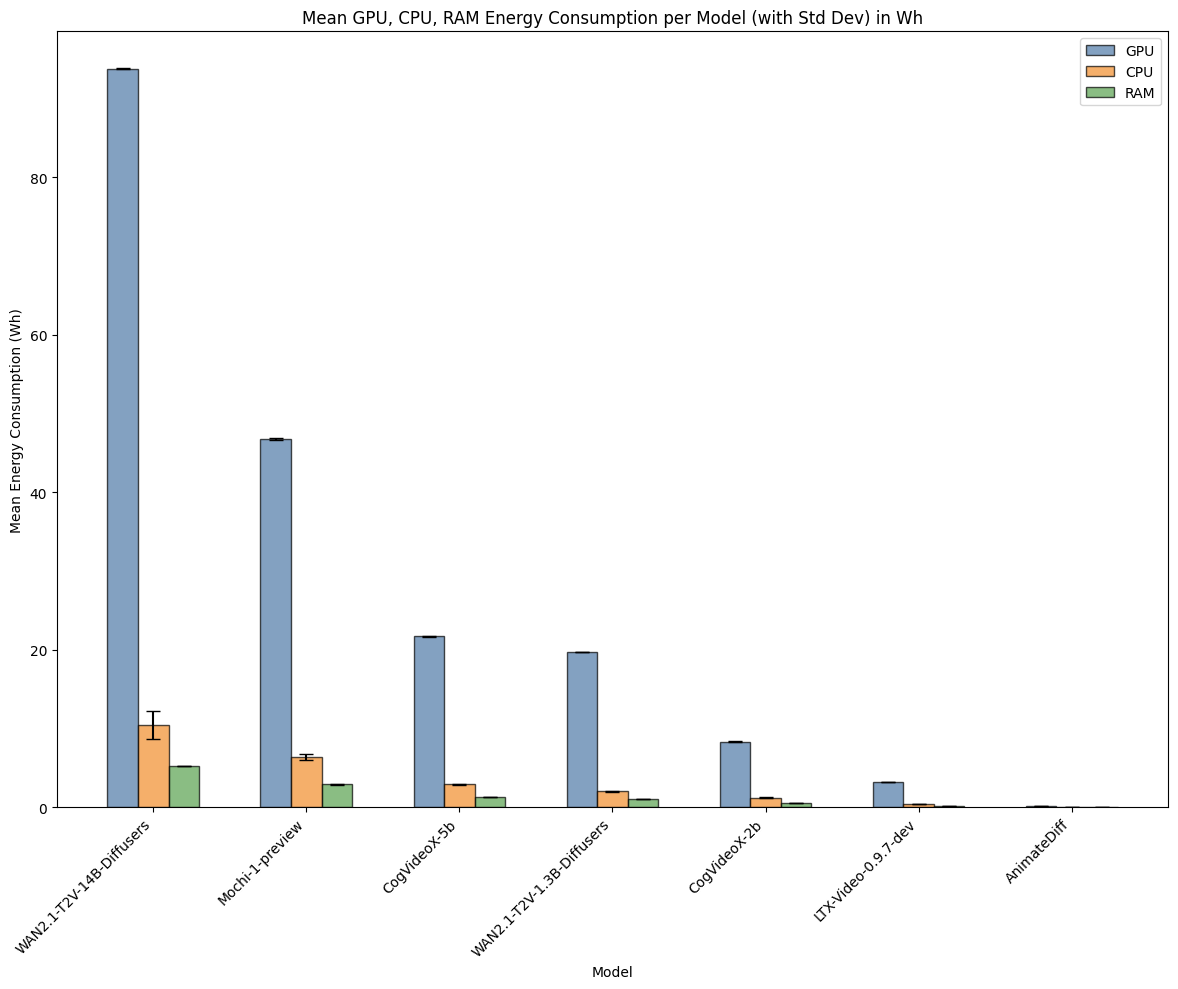

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Sélection des colonnes utiles
combined_df_copy = combined_df.copy()
combined_df_copy['energy_generate_gpu'] = combined_df_copy.apply(
    lambda row: (row['energy_generate_gpu'] + row['energy_upsample_gpu'] + row['energy_denoise_gpu']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_gpu'],
    axis=1
)
combined_df_copy['energy_generate_cpu'] = combined_df_copy.apply(
    lambda row: (row['energy_generate_cpu'] + row['energy_upsample_cpu'] + row['energy_denoise_cpu']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_cpu'],
    axis=1
)
combined_df_copy['energy_generate_ram'] = combined_df_copy.apply(
    lambda row: (row['energy_generate_ram'] + row['energy_upsample_ram'] + row['energy_denoise_ram']) if row['model_name'] == 'LTX-Video-0.9.7-dev' else row['energy_generate_ram'],
    axis=1
)
df = combined_df_copy[['model_name', 'energy_generate_gpu', 'energy_generate_cpu', 'energy_generate_ram']]

# Grouper : moyenne et écart-type
grouped_mean = df.groupby("model_name").mean(numeric_only=True)
grouped_std = df.groupby("model_name").std(numeric_only=True)

# Conversion en Wh (multiplication par 1000)
grouped_mean *= 1000
grouped_std *= 1000

# Fusionner pour trier
grouped = grouped_mean.join(grouped_std, lsuffix='_mean', rsuffix='_std')

# Trier par consommation GPU moyenne décroissante
grouped = grouped.sort_values(by='energy_generate_gpu_mean', ascending=False).reset_index()

# Préparer données
models = grouped["model_name"]
gpu_mean = grouped["energy_generate_gpu_mean"]
cpu_mean = grouped["energy_generate_cpu_mean"]
ram_mean = grouped["energy_generate_ram_mean"]

gpu_std = grouped["energy_generate_gpu_std"]
cpu_std = grouped["energy_generate_cpu_std"]
ram_std = grouped["energy_generate_ram_std"]

# Bar plot
bar_width = 0.2
x = range(len(models))

plt.figure(figsize=(12, 10))

plt.bar([p - bar_width for p in x], gpu_mean, yerr=gpu_std, width=bar_width,
        label="GPU", color="#4E79A7", alpha=0.7, edgecolor="black", capsize=5)
plt.bar(x, cpu_mean, yerr=cpu_std, width=bar_width,
        label="CPU", color="#F28E2B", alpha=0.7, edgecolor="black", capsize=5)
plt.bar([p + bar_width for p in x], ram_mean, yerr=ram_std, width=bar_width,
        label="RAM", color="#59A14F", alpha=0.7, edgecolor="black", capsize=5)

# Labels et légende
plt.xlabel("Model")
plt.ylabel("Mean Energy Consumption (Wh)")
plt.title("Mean GPU, CPU, RAM Energy Consumption per Model (with Std Dev) in Wh")
plt.xticks(x, models, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
'steps', 'height', 'width', 'num_frames', 'fps', 'model_hf_page'

In [ ]:
# sort by model, prompt
save_df = combined_df[['model_name', 'duration_generate', 'energy_generate_gpu', 'energy_generate_cpu',
       'energy_generate_ram', 'height', 'width', 'num_frames', 'fps', 'steps', 'prompt', 'cpu_count', 'cpu_model', 'gpu_count',
       'gpu_model',  'runs', 'warmup', 'model_hf_page', 
       'guidance_scale', 'negative_prompt', 'adapter_repo',
       'adapter_ckpt', 'base_model', 'duration_upsample',
       'duration_denoise', 'energy_upsample_gpu',
       'energy_denoise_gpu', 'energy_upsample_cpu', 'energy_denoise_cpu',
       'energy_upsample_ram', 'energy_denoise_ram', 'upsample_model_name',
       'downscaled_height', 'downscaled_width', 'generate_steps',
       'denoise_steps', 'denoise_strength', 'decode_timestep',
       'image_cond_noise_scale' ]]
save_df = save_df.sort_values(by=['model_name', 'prompt']).reset_index(drop=True)

In [8]:
save_df.to_csv(os.path.join(DATA_DIR, 'combined_results.csv'), index=False)

In [62]:
combined_df.columns

Index(['model_name', 'duration_generate', 'energy_generate_cpu',
       'energy_generate_ram', 'prompt', 'num_frames', 'runs', 'out_video',
       'out_csv', 'fps', 'warmup', 'output_path', 'name_csv', 'steps',
       'guidance_scale', 'negative_prompt', 'height', 'width', 'adapter_repo',
       'adapter_ckpt', 'base_model', 'out_gif', 'duration_upsample',
       'duration_denoise', 'energy_generate_gpu', 'energy_upsample_gpu',
       'energy_denoise_gpu', 'energy_upsample_cpu', 'energy_denoise_cpu',
       'energy_upsample_ram', 'energy_denoise_ram', 'upsample_model_name',
       'downscaled_height', 'downscaled_width', 'generate_steps',
       'denoise_steps', 'denoise_strength', 'decode_timestep',
       'image_cond_noise_scale', 'cpu_count', 'cpu_model', 'gpu_count',
       'gpu_model'],
      dtype='object')

In [55]:
combined_df[['model_name', 'energy_generate_gpu', 'energy_upsample_gpu',
       'energy_denoise_gpu', 'energy_upsample_cpu', 'energy_denoise_cpu',
       'energy_upsample_ram', 'energy_denoise_ram', 'upsample_model_name',
       'downscaled_height', 'downscaled_width', 'generate_steps',
       'denoise_steps', 'denoise_strength', 'decode_timestep',
       'image_cond_noise_scale']]

,model_name,energy_generate_gpu,energy_upsample_gpu,energy_denoise_gpu,energy_upsample_cpu,energy_denoise_cpu,energy_upsample_ram,energy_denoise_ram,upsample_model_name,downscaled_height,downscaled_width,generate_steps,denoise_steps,denoise_strength,decode_timestep,image_cond_noise_scale
0,AnimateDiff,0.000111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AnimateDiff,0.000112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AnimateDiff,0.000112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AnimateDiff,0.000110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AnimateDiff,0.000113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AnimateDiff,0.000113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AnimateDiff,0.000112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AnimateDiff,0.000113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AnimateDiff,0.000111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AnimateDiff,0.000113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
